<a href="https://colab.research.google.com/github/cuccurese2010/Cat-and-Dog-photo-recognize/blob/main/Copy_of_Cat_and_Dog_Trained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Questo codice importa le librerie necessarie per un ambiente di Google Colab e per lavorare con modelli di deep learning utilizzando la libreria Keras.
from google.colab import drive
from keras.models import load_model
from keras.preprocessing.image import load_img
import numpy as np
import gdown
import json
import matplotlib.pyplot as plt
# Queste importazioni sono comuni quando si lavora con reti neurali in ambienti come Google Colab, dove è necessario caricare modelli, immagini e utilizzare librerie di supporto.

In [ ]:
# Il codice monta Google Drive, carica il modello precedentemente allenato e recupera i dati della history da file JSON, che possono poi essere utilizzati per creare grafici o analizzare le prestazioni del modello.

# Monta Google Drive
drive.mount('/content/drive')

# Percorso completo del file H5(File che contiene l'allenamento precendentemente effettuato) su Google Drive
h5_file_path_drive = '/content/drive/MyDrive/Cat_vs_dogs_classification.h5'

# Carica il modello(File che contiene l'allenamento precendentemente effettuato) da Google Drive
model = load_model(h5_file_path_drive)

# Percorso completo del file JSON(Questo file contiene i dati del modello precedentemente allenato e lo useremo per creare i grafici) su Google Drive
json_file_path_drive = '/content/drive/MyDrive/history.json'

# Carica la history da file JSON (Questo file contiene i dati del modello precedentemente allenato e lo useremo per creare i grafici) da Google Drive
with open('/content/drive/MyDrive/history.json', 'r') as json_file:
    loaded_history_json = json_file.read()
loaded_history_dict = json.loads(loaded_history_json)


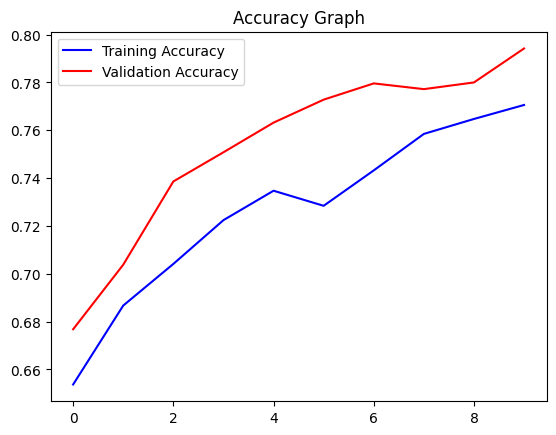

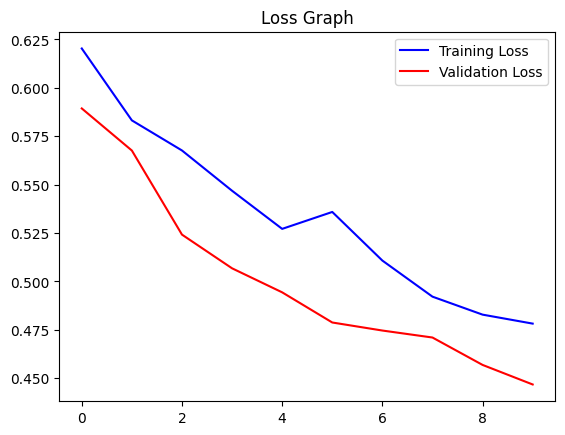

In [ ]:
# Questo codice crea due grafici utilizzando i dati della history del modello precedentemente allenato.

acc = loaded_history_dict['accuracy']
val_acc = loaded_history_dict['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = loaded_history_dict['loss']
val_loss = loaded_history_dict['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()
# In sintesi, questi grafici forniscono una visualizzazione dell'andamento dell'accuratezza e della loss durante l'allenamento e la validazione del modello.

1/1 [==============================] - 0s 85ms/step


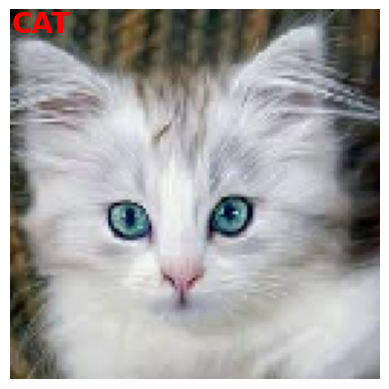

In [ ]:
# Percorso dell'immagine
image_path = "cat24.jpeg"

# Carica l'immagine e la ridimensiona
img = load_img(image_path, target_size=(128, 128))
img = np.array(img) / 255.0  # Normalizza l'immagine

# Crea il plot per mostrare l'immagine
plt.imshow(img)

# Aggiungi l'etichetta sopra l'immagine
pred = model.predict(np.expand_dims(img, axis=0))  # Effettua la previsione sull'immagine
if pred[0] > 0.5:
    label = 'DOG'
else:
    label = 'CAT'

plt.text(0, 0, label, color='red', fontsize=20, fontweight='bold', verticalalignment='top')

# Nascondi gli assi per una migliore visualizzazione
plt.axis('off')

# Mostra il plot
plt.show()